In [ ]:
"""
Split the processed EU database file (steps 1_0 to 1_2) into two database files and export them:
 - one for combustion engine vehicles
 - one for electric engine vehicles
For now we only use *.csv export 
"""

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
from config import COMBUSTION_FUEL_TYPES, DATABASE_FILE_DTYPES, DATABASE_FILE_INDEX, ELECTRIC_FUEL_TYPES, MERGED_COMBUSTION_FILE, MERGED_DATA_FILE, MERGED_ELECTRIC_FILE

In [2]:
df = pd.read_csv(MERGED_DATA_FILE, dtype=DATABASE_FILE_DTYPES, index_col=DATABASE_FILE_INDEX)

In [3]:
df.columns

Index(['member_state', 'manufacturer_name_eu', 'vehicle_type',
       'commercial_name', 'category_of_vehicle', 'fuel_type', 'fuel_mode',
       'innovative_technologies', 'mass_vehicle', 'weltp_test_mass',
       'engine_capacity', 'engine_power', 'erwltp', 'year', 'electric_range',
       'electric_energy_consumption', 'fuel_consumption',
       'specific_co2_emissions'],
      dtype='object')

In [4]:
df["fuel_type"].value_counts()

fuel_type
petrol             11214210
PETROL              5514245
diesel              3665237
electric            2945657
DIESEL              2239546
petrol/electric     1667397
ELECTRIC             999640
PETROL/ELECTRIC      850446
lpg                  536543
LPG                  208521
e85                   85113
diesel/electric       72320
DIESEL/ELECTRIC       55953
NG                    39153
ng                    25619
E85                    7237
NG-BIOMETHANE          4492
hydrogen               1968
HYDROGEN                924
unknown                 105
UNKNOWN                  94
Name: count, dtype: int64

In [5]:
# Merge fuel_types which differ only in capitalization
df["fuel_type"] = df["fuel_type"].str.lower()

In [6]:
# double check with value_counts from above if result makes sense
df["fuel_type"].value_counts()

fuel_type
petrol             16728455
diesel              5904783
electric            3945297
petrol/electric     2517843
lpg                  745064
diesel/electric      128273
e85                   92350
ng                    64772
ng-biomethane          4492
hydrogen               2892
unknown                 199
Name: count, dtype: int64

In [7]:
df["fuel_type"].value_counts(normalize=True)

fuel_type
petrol             0.555128
diesel             0.195948
electric           0.130923
petrol/electric    0.083554
lpg                0.024725
diesel/electric    0.004257
e85                0.003065
ng                 0.002149
ng-biomethane      0.000149
hydrogen           0.000096
unknown            0.000007
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Potential relationship of fuel_type to specific_co2_emissions')

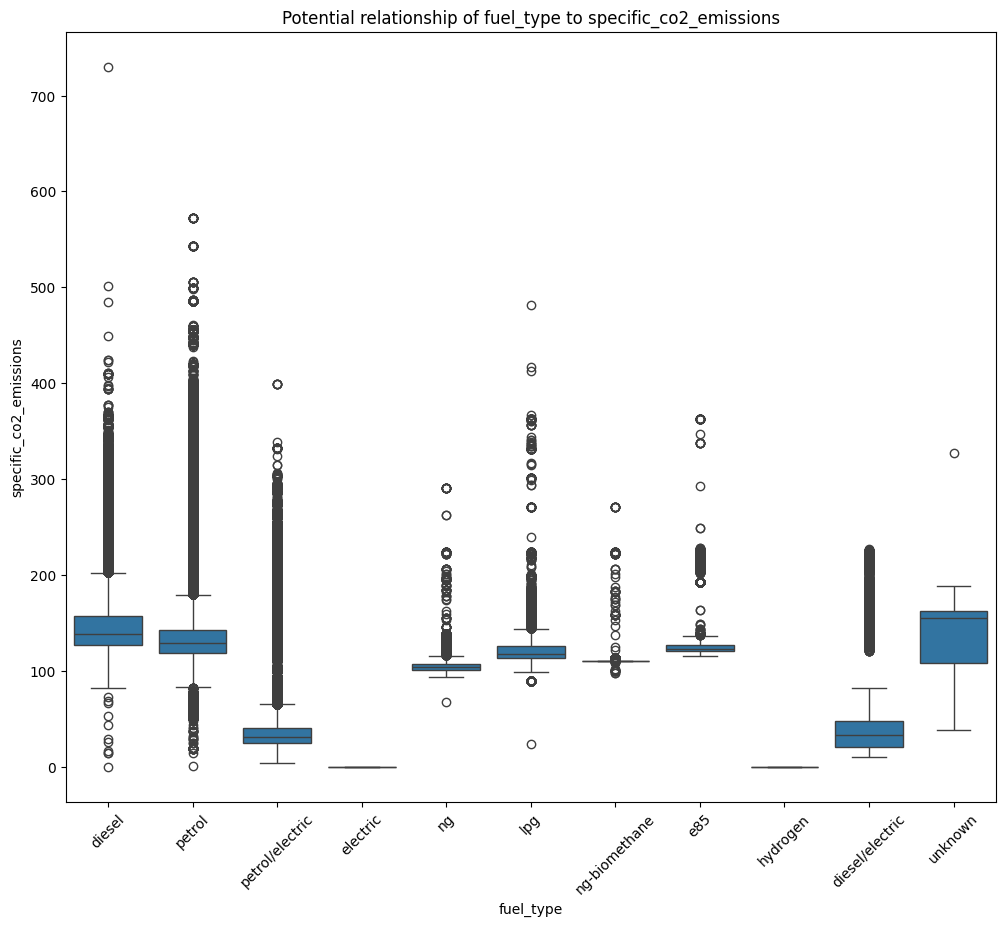

In [8]:
plt.figure(figsize=(12, 10))
sns.boxplot(x="fuel_type", y="specific_co2_emissions", data=df)


plt.xticks(rotation=45)
plt.xlabel("fuel_type")
plt.ylabel("specific_co2_emissions")
plt.title("Potential relationship of fuel_type to specific_co2_emissions")

## Combustion Fuel Types

In [ ]:
# split based on fuel_type combustion
df_combustion = df[df["fuel_type"].isin(COMBUSTION_FUEL_TYPES)]

In [ ]:
# check if fuel_types are as expected
df_combustion["fuel_type"].value_counts()

fuel_type
petrol             16728455
diesel              5904783
petrol/electric     2517843
lpg                  745064
diesel/electric      128273
e85                   92350
ng                    64772
ng-biomethane          4492
Name: count, dtype: int64

In [10]:
df_combustion.to_csv(MERGED_COMBUSTION_FILE, index=True)

## Electric Fuel Types

In [ ]:
# split based on fuel_type electric
df_electric = df[df["fuel_type"].isin(ELECTRIC_FUEL_TYPES)]

In [ ]:
# check if fuel_types are as expected
df_electric["fuel_type"].value_counts()

fuel_type
electric    3945297
Name: count, dtype: int64

In [12]:
df_electric.to_csv(MERGED_ELECTRIC_FILE, index=True)